In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders
# import os
# path = "/content/drive/MyDrive/Colab Notebooks/Dataset-Splitted"
# print(os.listdir(path))

In [ ]:
#splitfolders.ratio(path,seed=1337, output="DataSet_BUSI-Splitted", ratio=(0.6, 0.2, 0.2))

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import shutil
dataset_path = Path('/content/drive/MyDrive/ColabNotebooks/Dataset-Splitted')
# define the transform
train_transform = transforms.Compose([
    #transforms.Grayscale(1),
    transforms.Resize((256, 256)),  # resize images to 256x256
    transforms.RandomCrop((224, 224)),  # random crop images to 224x224
    transforms.ToTensor(),  # convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize images to ImageNet mean and sd
   # transforms.Normalize(mean=[0.5, ], std=[0.5, ])
])

test_transform = transforms.Compose([
    #transforms.Grayscale(1),
    transforms.Resize((224, 224)),  # resize images to 224x224
    transforms.ToTensor(),  # convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize images to ImageNet mean and sd
    #transforms.Normalize(mean=[0.5, ], std=[0.5, ])
])

# define the datasets
train_dataset = datasets.ImageFolder(dataset_path / 'train', transform=train_transform)
val_dataset = datasets.ImageFolder(dataset_path / 'val', transform=test_transform)
test_dataset = datasets.ImageFolder(dataset_path / 'test', transform=test_transform)

# define the dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
train_dataset.classes[:10]

['benign', 'malignant', 'normal']

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# from torchvision.models import resnet50, ResNet50_Weights

# # Fetch the pretrained ResNet-50 model
# model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [ ]:
n_classes = len(train_dataset.classes)
print(n_classes)

3


In [ ]:
# import torch
# import torch.nn as nn
# from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
# # Fetch the pretrained ResNet-50 model
# model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
# model.eval()
# # Modify the last layer
# #num_ftrs = model.fc.in_features  # get the number of input features for the last layer
# #model.fc = nn.Linear(num_ftrs, n_classes)  # create a new layer with the same number of input features and 100 output features

In [ ]:
import torch.nn as nn

# Instantiate the CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

In [ ]:
import torch.optim as optim

# Set the learning rate and weight decay
learning_rate = 0.001
weight_decay = 0.0001

# Instantiate the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [ ]:
# check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move the model to the GPU
model = model.to(device)

# Set the number of training epochs
num_epochs = 15

# Initialize lists for storing training metrics
train_losses = []
train_accuracies = []


# in your training loop, move your data to the GPU before feeding it into your model
for epoch in range(num_epochs):
    # Initialize metrics
    total_loss = 0.0
    correct = 0
    total = 0

    # Set the model to training mode
    model.train()

    # Iterate over the training dataset
    for images, labels in train_loader:
        # Move images and labels to the appropriate device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Parameter updates
        optimizer.step()

        # Update metrics
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    # Calculate average training loss and accuracy
    average_loss = total_loss / len(train_loader)
    accuracy = 100.0 * correct / total

    # Log training metrics
    train_losses.append(average_loss)
    train_accuracies.append(accuracy)

    # Print training metrics for the current epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch [1/15], Loss: 4.2190, Accuracy: 45.61%
Epoch [2/15], Loss: 0.7872, Accuracy: 77.73%
Epoch [3/15], Loss: 0.4118, Accuracy: 82.87%
Epoch [4/15], Loss: 0.2885, Accuracy: 88.65%
Epoch [5/15], Loss: 0.1935, Accuracy: 92.08%
Epoch [6/15], Loss: 0.2277, Accuracy: 92.29%
Epoch [7/15], Loss: 0.1368, Accuracy: 95.29%
Epoch [8/15], Loss: 0.1009, Accuracy: 95.93%
Epoch [9/15], Loss: 0.0649, Accuracy: 98.07%
Epoch [10/15], Loss: 0.0958, Accuracy: 97.00%
Epoch [11/15], Loss: 0.0669, Accuracy: 97.43%
Epoch [12/15], Loss: 0.0541, Accuracy: 97.86%
Epoch [13/15], Loss: 0.0498, Accuracy: 98.72%
Epoch [14/15], Loss: 0.0504, Accuracy: 98.07%
Epoch [15/15], Loss: 0.0461, Accuracy: 97.86%


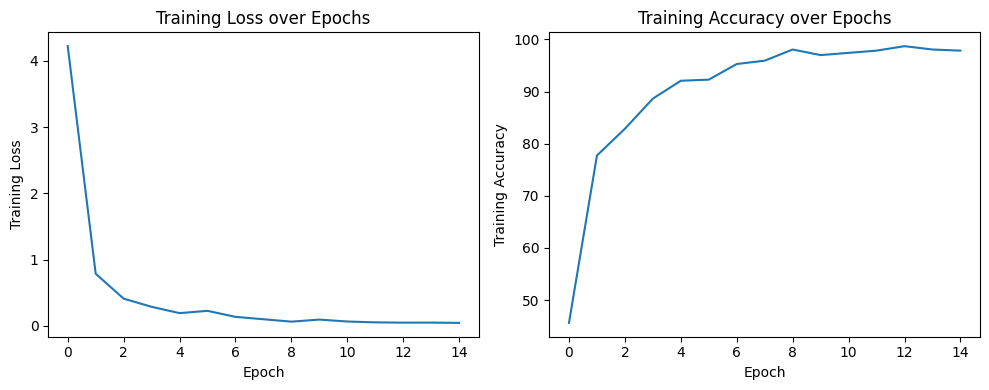

In [ ]:
import matplotlib.pyplot as plt

# Plot training metrics
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss over Epochs")
plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy over Epochs")
plt.tight_layout()
plt.show()

In [ ]:

def evaluate_model(model, dataloader):
    model.eval()  # Switch the model to evaluation mode

    # Initialize counters
    total = 0
    correct = 0
    true_positives = 0
    predicted_positives = 0
    actual_positives = 0

    with torch.no_grad():  # No need to calculate gradients for evaluation
        for images, labels in dataloader:
            images = images.to(device)  # Move images to the device
            labels = labels.to(device)  # Move labels to the device

            outputs = model(images)  # Get model outputs
            _, predicted = outputs.max(1)  # Get predicted classes

            # Update counters
            total += labels.size(0)  # Total number of samples
            correct += predicted.eq(labels).sum().item()  # Total number of correct predictions

            # Count the true positives, predicted positives, and actual positives
            true_positives += torch.logical_and(predicted == 1, labels == 1).sum().item()
            predicted_positives += (predicted == 1).sum().item()
            actual_positives += (labels == 1).sum().item()



    # Calculate metrics
    accuracy = 100.0 * correct / total  # Accuracy = correct / total
    precision = true_positives / predicted_positives  # Precision = TP / (TP + FP)
    recall = true_positives / actual_positives  # Recall = TP / (TP + FN)

    return accuracy, precision, recall



test_accuracy, test_precision, test_recall = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")


Test Accuracy: 84.16%
Test Precision: 0.74
Test Recall: 0.81


In [ ]:
import torchvision.transforms as transforms
from PIL import Image

# Load and preprocess the new image
image_path = "/content/drive/MyDrive/ColabNotebooks/Dataset-Splitted/test/malignant/malignant (151).png"
image = Image.open(image_path).convert("RGB")

# Define the transformation for the new image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformation to the new image
input_image = transform(image).unsqueeze(0)

# Move the input image to the appropriate device
input_image = input_image.to(device)

# Set the model to evaluation mode
model.eval()

# Make predictions on the new image
with torch.no_grad():
    outputs = model(input_image)

# Get the predicted class labels
_, predicted = outputs.max(1)

# Get the predicted class probabilities
probabilities = torch.nn.functional.softmax(outputs, dim=1)[0]

# Print the predicted class label and probabilities
class_label = predicted.item()
class_prob = probabilities[class_label].item()
print(f"Predicted class: {test_dataset.classes[class_label]}")
print(f"Probability: {class_prob:.2f}")


Predicted class: malignant
Probability: 1.00


Confusion Matrix:
[[107  13   3]
 [  9  48   2]
 [  4   4  31]]


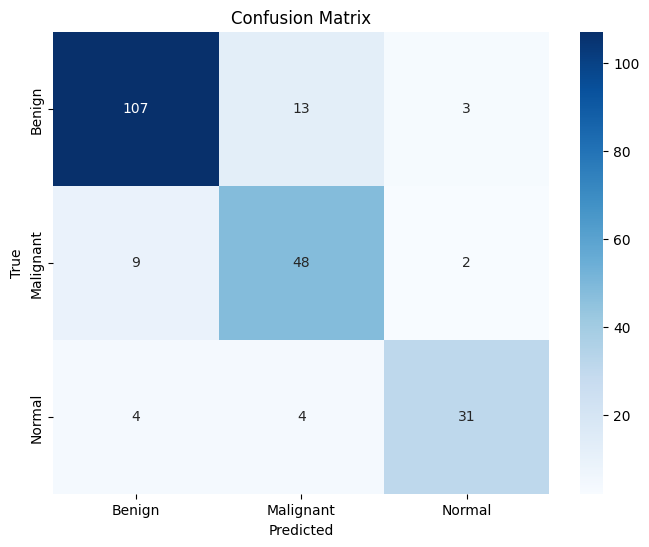

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import ConcatDataset
num_classes=3

label_names=["Benign","Malignant","Normal"]
# Initialize an empty confusion matrix
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Inside your training loop
#for epoch in range(num_epochs):
    # ... (your existing code)

    # Get predictions for the validation set
model.eval()
y_true = []
y_pred = []
dataset_combo=ConcatDataset([train_dataset,test_dataset,val_dataset])
with torch.no_grad():
       for inputs, labels in test_loader:
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          _, predicted = torch.max(outputs, 1)

          y_true.extend(labels.cpu().numpy())
          y_pred.extend(predicted.cpu().numpy())

    # Calculate confusion matrix
conf_matrix += confusion_matrix(y_true, y_pred, labels=range(num_classes))

    # Print or store the confusion matrix if needed
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
test_loader.dataset.find_classes

<bound method DatasetFolder.find_classes of Dataset ImageFolder
    Number of datapoints: 221
    Root location: /content/drive/MyDrive/ColabNotebooks/Dataset-Splitted/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )>